# Importación y limpieza de datos

In [2]:
import pandas as pd
import numpy as np 
import plotly.express as px
import datetime as dt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from datetime import datetime
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import random
from sklearn.covariance import LedoitWolf
import sys
from sklearn.covariance import empirical_covariance
from scipy.spatial import distance
from sklearn.mixture import GaussianMixture

In [3]:
# Importacion series de tiempo
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

c:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [58]:
df2 = pd.read_csv('D:/nuevo/universidad/Master/Proyecto_Integrador/DB_MOL_1.csv',  parse_dates=[2], infer_datetime_format= True)
df2["Unidades"] = pd.to_numeric(df2["Unidades"])
# df2['Date'] == '09/12/2022'	

,Date,FAMILIA_DESC,CATEGORIA,TALLA,Unidades
0,09/12/2022,BLUSAS,MANGA_CORTA_M,M,1
1,09/12/2022,BLUSAS,MANGA_SISA,M,1
2,09/12/2022,BLUSAS,MANGA_SISA,XL,1
3,09/12/2022,BUSOS,BUSO_H,XL,1
4,09/12/2022,CAMIBUSOS,CAMIBUSO,S,1
...,...,...,...,...,...
76450,02/01/2020,POLOS,POLO,M,3
76451,02/01/2020,POLOS,POLO,XL,1
76452,02/01/2020,POLOS,POLO,XXL,1
76453,02/01/2020,POLOS,POLO_B,M,1


In [4]:
# Base de datos Tienda Molinos agrupada y el tiempo en semanas con el número de la semana en el año
df2_group = pd.read_csv('D:/nuevo/universidad/Master/Proyecto_Integrador/DB_Agrup_refinada.csv',  parse_dates=[2], infer_datetime_format= True)
df2_group["Unidades"] = pd.to_numeric(df2_group["Unidades"])
df2_group.columns

Index(['Semana', 'Prenda', 'Unidades'], dtype='object')

In [270]:
# Corrección agrupación SQL 
df2_group = df2_group.groupby(by = [ 'Semana','Prenda']).sum()
df2_group = df2_group.sort_values(['Semana'],ascending = True) 
df2_group = df2_group.reset_index()
df2_group.head(25)

,Semana,Prenda,Unidades
0,1,BLUSAS,38
1,1,BUSOS,3
2,1,CAMIBUSOS,4
3,1,CAMISAS,57
4,1,CAMISETAS,57
5,1,JEANS,238
6,1,PANTALON COLOR,105
7,1,POLOS,30
8,2,VESTIDOS,1
9,2,TAPABOCAS,16


In [105]:
df2_group.head(50)

,Semana,Prenda,Unidades
0,1,BLUSAS,4
1,1,BUSOS,1
2,1,CAMISAS,7
3,1,CAMISETAS,4
4,1,JEANS,17
5,1,PANTALON COLOR,9
6,1,TAPABOCAS,2
7,2,BERMUDA,1
8,2,BLUSAS,3
9,2,BUSOS,2


## Estadísticos

In [ ]:
#Group By por almacen 
VentaxTienda  = df.groupby(['Date','NOMBREALMACEN', 'FAMILIA_DESC']).sum()
VentaxTienda = VentaxTienda.sort_values(by = ['Date'], ascending= False)
VentaxTienda = VentaxTienda.reset_index()
VentaxTienda = VentaxTienda.where(df['DEPARTAMENTO_DESC'] != 'HOMBRE')
VentaxTienda

,Date,NOMBREALMACEN,FAMILIA_DESC,Unidades
0,9/30/2022,VIVA ENVIGADO,VESTIDOS,-1.0
1,9/30/2022,MARINILLA,CAMISAS,2.0
2,9/30/2022,MAYORCA 1,CAMISAS,1.0
3,9/30/2022,MAYORCA 1,BUSOS,1.0
4,9/30/2022,MAYORCA 1,BLUSAS,2.0
...,...,...,...,...
109893,01/02/2020,PUERTA DEL NTE,CAMISETAS,5.0
109894,01/02/2020,PUERTA DEL NTE,JEANS,41.0
109895,01/02/2020,ARKADIA,CAMIBUSOS,2.0
109896,01/01/2022,COMPRETEX ECOMMERCE,PANTALON COLOR,1.0


In [ ]:
fig = px.box(df_g_2 , x = 'Unidades', y ="FAMILIA_DESC")
fig

In [ ]:
fig = px.pie(VentaxTienda, values='Unidades', names='NOMBREALMACEN', title='Unidades Vendidas por Tienda')
fig

## Plots de visualización de los datos

In [ ]:
#Histograma de la distribución de tipos de familia
fig = px.histogram(df, x= 'FAMILIA_DESC')
fig 

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Histograma de la distribución de tallas 
fig = px.histogram(df, x="TALLA", histfunc='sum')
fig

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# boxplot de #Group By por  sexo & familia

fig = px.box(df_g_f, x="Unidades")
fig

In [ ]:
# boxplot de #Group By por  sexo & familia
#Group By por almacen & tipo de producto
# sort por unidades
fig = px.box(df_g_2, x="FAMILIA_DESC")
fig


In [ ]:
# df.to_csv('/content/drive/My Drive/Colab Notebooks/Msc/Proyecto_Integrador/BDF.csv')


# Encoder y correlaciones

In [5]:
# Seleccionar columnas a codificar
# df_en = df2.drop(columns = 'Unidades')

df_en = df2_group 
df_en


,Semana,Prenda,Unidades
0,1,BLUSAS,38
1,1,BUSOS,3
2,1,CAMIBUSOS,4
3,1,CAMISAS,57
4,1,CAMISETAS,57
...,...,...,...
735,53,JOGGER,69
736,53,PANTALON COLOR,344
737,53,POLOS,112
738,53,TAPABOCAS,8


In [6]:
cat = df_en.columns.values
cat

array(['Semana', 'Prenda', 'Unidades'], dtype=object)

In [7]:
# Disminuimos dimension para no afectar unidades y semanas
cat = cat[1:2]

In [8]:
cat

array(['Prenda'], dtype=object)

In [9]:
# Codificador de variables categóricas a numéricas 

encoder = preprocessing.LabelEncoder()

for i in cat:
  enc1 = encoder.fit(df_en[i])  #no se guardan las clases
  df_en[i]  = enc1.transform(df_en[i])
  

In [10]:
a = enc1.transform(["BLUSAS"])
a[0]

1

In [276]:
# Cambio de entero a la columna unidades para poder representar su máximo valor 
df_en["Unidades"] = pd.to_numeric(df_en["Unidades"])
type(df_en['Unidades'])
df_en.max()

Semana        53
Prenda        14
Unidades    1878
dtype: int64

In [277]:
df_en

,Semana,Prenda,Unidades
0,1,1,38
1,1,2,3
2,1,3,4
3,1,4,57
4,1,5,57
...,...,...,...
735,53,1,120
736,53,0,18
737,53,13,8
738,53,5,177


In [278]:
list(enc1.classes_)

['BERMUDA',
 'BLUSAS',
 'BUSOS',
 'CAMIBUSOS',
 'CAMISAS',
 'CAMISETAS',
 'CHAQUETAS',
 'CORREAS',
 'JEANS',
 'JOGGER',
 'PANTALON COLOR',
 'POLOS',
 'SHORT',
 'TAPABOCAS',
 'VESTIDOS']

In [143]:
# Correlacion 

correlation_matrix = df_en.corr()
correlation_matrix

,Semana,Prenda,Unidades
Semana,1.000000,-0.014758,0.150437
Prenda,-0.014758,1.000000,0.055142
Unidades,0.150437,0.055142,1.000000


In [120]:
# Cov 
cov_matrix = df_en.cov()
cov_matrix

,Semana,Prenda,Unidades
Semana,226.362712,-0.946025,520.397440
Prenda,-0.946025,18.153149,79.589767
Unidades,520.397440,79.589767,100247.844216


# Modelos ML

## KMeans

In [17]:
# Kmeans
kmeans = KMeans(n_clusters = 15, random_state = 8).fit(df_en) #original df_en
kmeans.labels_


array([ 9,  8,  8,  9,  9,  5, 12,  9,  9,  8,  8, 12,  9, 10,  9, 13,  9,
        8,  8,  8,  9,  8,  8,  9,  9,  8,  8,  5,  8,  3,  9,  8,  8,  9,
        8,  8, 12,  9,  8,  8,  5,  9,  3,  9,  8,  8, 12,  8,  8, 12, 12,
        8,  8, 10,  9,  3,  9,  8,  8, 12,  8,  8, 12,  9,  8,  8, 10,  9,
       13,  9,  8,  8,  9,  8,  8, 12,  9,  8,  8,  5,  9,  3,  9,  8,  8,
        9,  8,  8, 12,  9,  8,  8,  5,  8,  3,  9,  8,  8,  9,  8,  8, 12,
        9,  8,  8, 10,  9,  3,  9,  8,  8,  8,  9,  8,  8, 12,  9,  8,  8,
       10,  9,  3,  9,  8,  8,  8,  9,  8,  8, 12,  9,  8,  8, 10,  9,  3,
        9,  8,  8,  8,  9,  8,  8,  9,  9,  8,  8,  5,  9, 12,  9,  8,  8,
        8,  9,  8,  8,  9,  9,  8,  8, 10,  9,  3,  9,  8,  8,  8, 12,  8,
        8, 12,  9,  8,  8, 10,  9, 12,  9,  8,  8,  8,  9,  8,  8,  9,  9,
        8,  8,  5,  9, 12,  8,  8,  9,  8,  8,  9,  9,  8,  8,  5,  9, 12,
        9,  8,  8,  8,  9,  8,  8,  9,  9,  8,  8,  5,  9, 12,  9,  8,  8,
        9,  8,  8,  9,  9

In [18]:
df2_group['Cluster'] = kmeans.labels_
fig = px.scatter_3d(df2_group, x='Semana', y='Prenda', z='Unidades', color = 'Cluster')

fig.update_layout(height = 500)
fig

In [15]:
df2_group

,Semana,Prenda,Unidades,Cluster
0,1,1,38,6
1,1,2,3,1
2,1,3,4,1
3,1,4,57,6
4,1,5,57,6
...,...,...,...,...
735,53,9,69,6
736,53,10,344,0
737,53,11,112,4
738,53,13,8,1


In [16]:
df2_group['Cluster'][df2_group['Prenda'] == 1]
# s['UNIDADES'][s['PRENDA'] == a[0]]

0      6
8      6
20     6
33     6
46     6
59     6
72     6
85     6
98     6
112    6
126    6
140    1
154    6
168    6
182    6
194    6
208    6
221    6
235    6
249    6
264    6
279    6
294    6
309    6
324    6
339    6
354    6
369    6
384    1
399    6
414    6
429    6
444    6
459    6
474    6
489    6
504    6
518    6
532    6
547    6
561    6
575    6
589    6
603    6
616    6
629    6
643    6
657    6
671    4
685    4
699    4
713    0
727    4
Name: Cluster, dtype: int32

In [73]:
# Kmeans6
# dfkmeans = df.iloc[:,1:]
kmeans = KMeans(n_clusters = 5, random_state = 8).fit(df_en) #original df_en
kmeans.labels_

array([4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 2, 4, 4, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 4, 2, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 2,
       4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0, 4, 2, 4, 4, 0, 0, 4, 4, 0, 4, 4,
       4, 0, 0, 4, 2, 4, 4, 0, 0, 4, 4, 4, 4, 1, 4, 4, 0, 4, 4, 4, 0, 0,
       4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 2, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 0,
       0, 2, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 0, 4, 2, 4, 0, 0, 4, 4, 0, 4,
       4, 0, 4, 4, 4, 0, 2, 1, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 0, 4, 2, 4,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 1, 4, 4,
       0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 2, 4, 4, 0, 4, 4, 4, 4, 4,
       0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 2, 4, 0, 0, 4, 4, 0, 4, 4, 4,
       4, 4, 4, 0, 4, 1, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 2, 4, 4,

In [74]:
fig = px.scatter_3d(df2_group, x='Semana', y='Prenda', z='Unidades', color = 'Cluster')

fig.update_layout(height = 500)
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('Semana=%{x}<br>Prenda=%{y}<br>' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([2, 2, 2, ..., 2, 5, 2]),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': array([ 1,  1,  1, ..., 53, 53, 53], dtype=int64),
              'y': array([ 1,  2,  4, ..., 13,  5, 14]),
              'z': array([ 44,   1,  48, ...,   8, 353,   4], dtype=int64)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Cluster'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'height': 500,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'Semana'}},
                         'yaxis': {'title': {'text': 'Prenda'}},
                         'zaxis': {'title': {'text': 'Unidades'}}},
               'template': '...'}
})

In [31]:
df2_group['Unidades'][df2_group['Cluster'] == 0]

5      173
11      96
13     113
17     168
18     180
      ... 
738    169
741    105
745    223
747    137
754    239
Name: Unidades, Length: 222, dtype: int64

In [165]:
np.unique(df2_group['Unidades'][df2_group['Cluster'] == 5], return_index=False, return_inverse=False, return_counts=False, axis=None)


array([284, 289, 290, 291, 298, 300, 302, 304, 305, 306, 308, 312, 322,
       326, 327, 328, 331, 342, 343, 344, 349, 353, 359, 363, 379, 398,
       399, 402, 405, 410, 411, 415, 419, 420, 423, 424, 430, 438, 439,
       441, 442, 449, 453, 458, 467, 475, 476, 479, 489, 498, 504, 528,
       533, 581, 599, 609])

In [ ]:
kmeans.inertia_
kmeans.cluster_centers_

array([[ 12.06410627,   6.24227548,   6.96361536],
       [ 27.676     ,   7.78      ,  35.838     ],
       [ 42.18571429,   8.15714286, 173.84285714],
       [ 37.67451382,   6.15404299,   6.41914023],
       [ 30.28940568,   8.00775194,  75.4496124 ],
       [ 45.16666667,   8.        , 357.25      ]])

In [ ]:
kmeans.labels_

array([3, 3, 3, ..., 0, 1, 0], dtype=int32)

In [79]:
df2_group

,Semana,Prenda,Unidades,Cluster
0,1,1,44,2
1,1,2,1,2
2,1,4,48,2
3,1,5,27,2
4,1,6,2,2
...,...,...,...,...
754,53,1,239,0
755,53,0,18,2
756,53,13,8,2
757,53,5,353,5


# $ K \ Óptimo$

In [282]:
def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x,y,'ro-',markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()

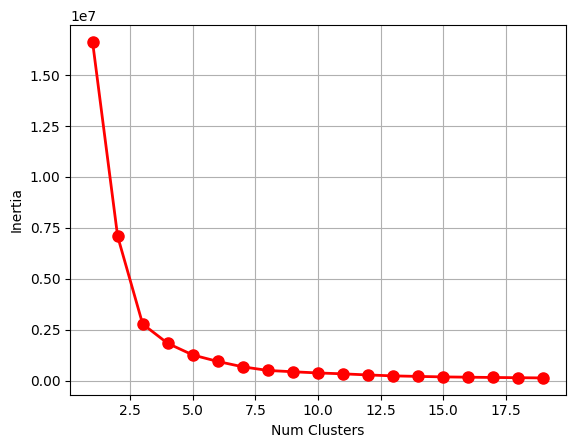

In [283]:
inertia_cluster = list()
for i in range(1,20,1):
    kmeans = KMeans(n_clusters = i, random_state = 8).fit(df_en) #original df_en
    ##kmeans.labels_
    inertia_cluster.append([i,kmeans.inertia_])

plot_results(inertia_cluster)




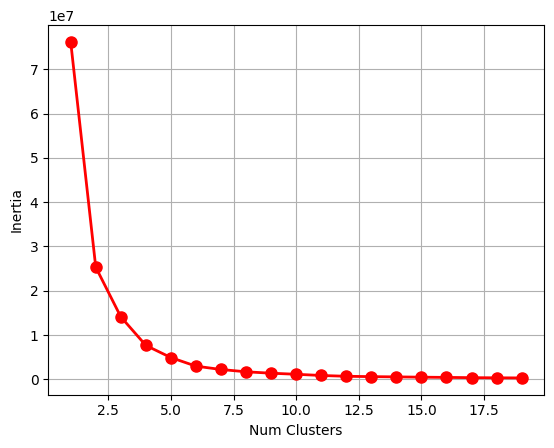

In [53]:
plot_results(inertia_cluster)


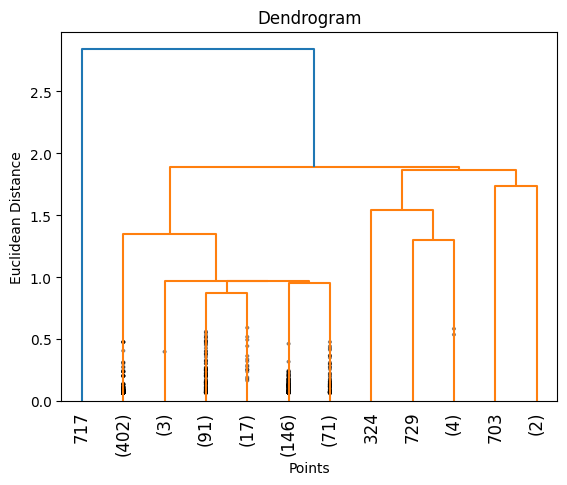

In [284]:
Z = linkage(df_en, metric='mahalanobis')
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Euclidean Distance')
dendrogram(
        Z,
        truncate_mode='lastp',
        p=12,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True
    )
plt.show()

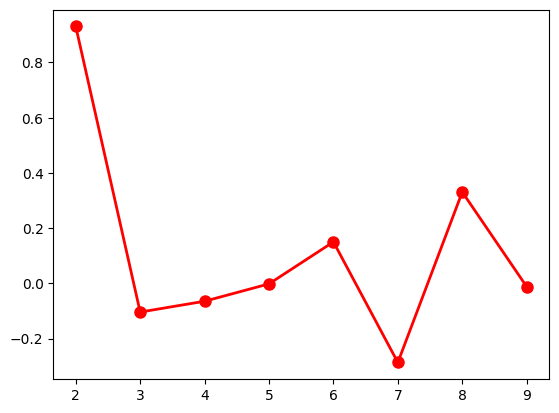

In [285]:
#GAP

# Calculate distances between points or groups of points
Z = linkage(df_en, metric='mahalanobis')

# Obtain the last 10 distances between points
last = Z[-10:, 2]
num_clustres = np.arange(1, len(last) + 1)

# Calculate Gap
gap = np.diff(last, n=2)  # second derivative
plt.plot(num_clustres[:-2] + 1, gap[::-1], 'ro-', markersize=8, lw=2)
plt.show()

## Regresion Lineal

In [ ]:
#KM2 = df2.iloc[kmeans.labels_]
#KM[KM['Cluster'] == 4]
np.unique(df2['Unidades'][df2['Cluster']==0], return_index=False, return_inverse=False, return_counts=False, axis=None)

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '4', '5', '6', '7', '8', '9'], dtype=object)

In [80]:
df_en['Cluster']= kmeans.labels_


In [115]:
np.unique(df_en['Prenda'][df_en['Cluster']==0], return_index=False, return_inverse=False, return_counts=False, axis=None)


array([ 1,  2,  3,  4,  5,  8,  9, 10, 11])

In [153]:
clus_0 = df_en[df_en['Prenda'] == 8]
clus_0_P_8 = clus_0[clus_0['Cluster'] == 1]
clus_0_P_8

,Semana,Prenda,Unidades,Cluster
139,11,8,1592,1
195,15,8,1096,1
269,20,8,1135,1
324,24,8,1293,1
343,25,8,1848,1
359,26,8,1314,1
538,38,8,1169,1
595,42,8,1156,1
651,46,8,1393,1
660,47,8,1225,1


In [146]:
clus_0_P_8['Unidades'].min()

1096

In [154]:
clus_0_P_8_norm = np.sqrt(clus_0_P_8['Unidades'])
clus_0_P_8_norm

139    39.899875
195    33.105891
269    33.689761
324    35.958309
343    42.988371
359    36.249138
538    34.190642
595    34.000000
651    37.322915
660    35.000000
679    37.121422
688    33.226495
702    33.970576
748    41.785165
Name: Unidades, dtype: float64

In [155]:
# Var
var_final = clus_0_P_8_norm.var()
var_final

10.225521673909382

In [156]:
xvar = len(clus_0_P_8_norm)
xvar = list(range(1,xvar+1))
xvar

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

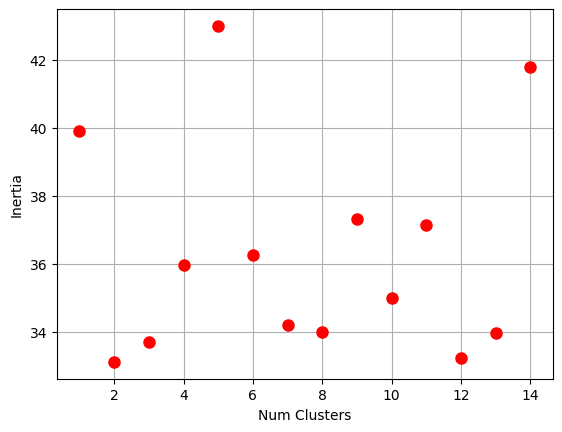

In [157]:
plt.plot(xvar,clus_0_P_8_norm,'ro',markersize=8, lw=2)
plt.grid(True)
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.show()

In [158]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 

In [ ]:
pf = PolynomialFeatures(degree = 3)

In [ ]:
modelo = linear_model.LinearRegression()
# Entreno el modelo con los datos (X,Y)
modelo.fit(x, y)


In [90]:
px.scatter(df_P_1_C_0_Norm, x = 'Semana', y = 'Unidades')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Semana=%{x}<br>Unidades=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([1.        , 1.41421356, 1.41421356, ..., 7.28010989, 7.28010989,
                          7.28010989]),
              'xaxis': 'x',
              'y': array([13.15294644,  9.79795897, 10.63014581, ..., 14.93318452, 11.70469991,
                          15.45962483]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Semana'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Unidades'}}}
})

In [98]:
# Regresión Lineal 
model_1 = smf.ols("Unidades ~ Semana + Prenda" , df_P_1_C_0_Norm)
model_1 

In [99]:
#El resultado de los Betas calculados es el fit
fitmodel_1 = model_1.fit()

In [100]:
#sumario, Ecuacion de regresion ajustada
print(fitmodel_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Unidades   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.888
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0578
Time:                        17:14:12   Log-Likelihood:                -452.47
No. Observations:                 222   AIC:                             910.9
Df Residuals:                     219   BIC:                             921.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9116      0.537     24.027      0.0

# Series de tiempo



In [50]:
# df2['Date'] = pd.to_datetime(df2['Date'], format='%Y/%m/%d')

# df2 = df2.set_index('Date')

# df2 = df2.rename(columns={'x': 'y'})

df2 = df2.asfreq('MS')
df2 = df2.sort_index()
df2.head()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3916\2439756311.py:7: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3916\2439756311.py:7: FutureWarning:

reindexing with a non-unique Index is deprecated and will raise in a future version.



ValueError: cannot reindex on an axis with duplicate labels

# Predicción

In [34]:
datSem = df2_group[df2_group['Semana'] == 5]
datSem

,Semana,Prenda,Unidades,Cluster
46,5,1,80,6
47,5,2,3,1
48,5,3,14,1
49,5,4,87,6
50,5,5,81,6
51,5,6,7,1
52,5,7,4,1
53,5,8,320,0
54,5,9,31,1
55,5,10,150,4


In [15]:
datSem

NameError: name 'datSem' is not defined

In [177]:
unidadesDat = df2_group[df2_group['Cluster'] == 3]

In [178]:
unidadesDat

,Semana,Prenda,Unidades,Cluster
0,1,1,22,3
1,1,2,1,3
2,1,4,24,3
3,1,5,14,3
4,1,6,2,3
...,...,...,...,...
750,53,6,5,3
753,53,2,18,3
755,53,0,18,3
756,53,13,8,3


In [189]:
unidadesDatre = unidadesDat['Unidades'][unidadesDat['Prenda'] == 14]
unidadesDatre.median()



4.0

In [35]:
def seman(Semana):
    
    
    datSem = df2_group[df2_group['Semana'] == Semana]
    tam = len(datSem)
    prd = pd.DataFrame(columns=['Prenda','Unidades'],index=range(tam))
    for i in range(len(datSem)):
        #print(datSem.iloc[i]['Cluster'])
        unidadesDat = df2_group[df2_group['Cluster'] == datSem.iloc[i]['Cluster']]
        #print(datSem.iloc[i]['Prenda'])
        unidadesDatre = unidadesDat['Unidades'][unidadesDat['Prenda'] == datSem.iloc[i]['Prenda']]
        
        # print(datSem.iloc[i]['Prenda'])
        # print(unidadesDatre.median())
        #df = df.append({'first_name': 'Josy', 'last_name':'Clarae', 'gender':'Female'}, ignore_index=True)
        prd.iloc[i] = (datSem.iloc[i]['Prenda'], unidadesDatre.median())
        # prd = prd.append({'Prenda': datSem.iloc[i]['Prenda']}, index=i)
        # prd = prd.append({'Unidades': unidadesDatre.median()}, index=i)
        #prd[i]['Prenda']= datSem.iloc[i]['Prenda']
        # prd[i]['Unidades']= unidadesDatre.median()
        # print('hola')
    return prd
    

In [62]:
s = seman(5)

In [66]:
s['Unidades'][s['Prenda'] == a[0]]

7    288.0
Name: Unidades, dtype: object

In [67]:
s

,Prenda,Unidades
0,1,54.0
1,2,7.0
2,3,15.0
3,4,76.0
4,5,62.0
5,6,6.0
6,7,4.0
7,8,288.0
8,9,31.0
9,10,151.0


In [50]:
a = enc1.transform(["1"])
a[0]

ValueError: y contains previously unseen labels: '1'

In [249]:
from proyectoprincipal import predictInve

In [288]:
# df = pd.read_csv('D:/nuevo/universidad/Master/Proyecto_Integrador/bdCompletarAgrupRefinada.csv',  parse_dates=[2], infer_datetime_format= True)
# df["Unidades"] = pd.to_numeric(df["Unidades"])
alist = pd.DataFrame()
tor = []
for i in range(54):
    alist = predictInve(tienda= 'MOLINOS 1',semana= i)
    tor.append(alist['Unidades'].sum())

alist

,Prenda,Unidades
0,0,4.0
1,1,182.0
2,2,7.0
3,3,47.0
4,4,146.0
5,5,177.0
6,6,6.0
7,7,4.0
8,8,616.0
9,9,43.0


In [289]:
tor

[0,
 343.5,
 793.0,
 778.0,
 774.0,
 774.0,
 658.5,
 807.0,
 791.0,
 791.0,
 795.0,
 1092.0,
 711.5,
 790.0,
 638.5,
 798.0,
 580.5,
 665.5,
 654.5,
 810.0,
 810.0,
 810.0,
 810.0,
 798.0,
 810.0,
 1337.0,
 915.0,
 810.0,
 793.0,
 747.5,
 641.5,
 764.5,
 653.5,
 807.0,
 735.5,
 735.5,
 620.5,
 810.0,
 807.0,
 810.0,
 655.5,
 752.5,
 795.0,
 795.0,
 802.0,
 711.5,
 810.0,
 1162.0,
 1320.0,
 807.0,
 810.0,
 3755.0,
 3900.0,
 1593.5]

# Pruebas correlaciones

In [300]:
df = pd.read_csv('D:/nuevo/universidad/Master/Proyecto_Integrador/Errores_2_prueba.csv')
df


,Semana,2020.00,2021.00,2022.00,predic
0,1,532.0,437.75,437.75,343.5
1,2,944.0,706.00,793.00,793.0
2,3,771.0,443.00,598.00,778.0
3,4,712.0,671.00,680.00,774.0
4,5,871.0,780.00,746.00,774.0
5,6,807.0,783.00,992.00,658.5
6,7,806.0,703.00,670.00,807.0
7,8,707.0,832.00,653.00,791.0
8,9,722.0,860.00,757.00,791.0
9,10,703.0,842.00,858.00,795.0


In [304]:
df.corr()

,Semana,2020.00,2021.00,2022.00,predic
Semana,1.000000,0.519399,0.576540,0.490022,0.405571
2020.00,0.519399,1.000000,0.861866,0.914932,0.810536
2021.00,0.576540,0.861866,1.000000,0.912887,0.836664
2022.00,0.490022,0.914932,0.912887,1.000000,0.846512
predic,0.405571,0.810536,0.836664,0.846512,1.000000


In [70]:
def predictPrenda(tienda,semana,prenda):
    df = pd.read_csv('D:/nuevo/universidad/Master/Proyecto_Integrador/bdCompletarAgrupRefinada.csv',  parse_dates=[2], infer_datetime_format= True)
    df["Unidades"] = pd.to_numeric(df["Unidades"])
    dretu = pd.DataFrame()
    datSem = df[df['Tienda'] == tienda]
    df_en = datSem.drop(columns = 'Tienda')

    #Codificación de la columna Prendas
    encoder = preprocessing.LabelEncoder()
    enc1 = encoder.fit(df_en['Prenda'])  #no se guardan las clases
    df_en['Prenda']  = enc1.transform(df_en['Prenda'])

    # Kmeans
    kmeans = KMeans(n_clusters = 8, random_state = 8).fit(df_en) #original df_en
    df_en['Cluster'] = kmeans.labels_

    a = enc1.transform(["JEANS"])
    a[0]

    s = seman(semana,df_en)
    s['Unidades'][s['Prenda'] == a[0]]
    return dretu

def seman(Semana, df):
    datSem = df[df['Semana'] == Semana]
    tam = len(datSem)
    prd = pd.DataFrame(columns=['Prenda','Unidades'],index=range(tam))
    for i in range(len(datSem)):
        #print(datSem.iloc[i]['Cluster'])
        unidadesDat = df[df['Cluster'] == datSem.iloc[i]['Cluster']]
        #print(datSem.iloc[i]['Prenda'])
        unidadesDatre = unidadesDat['Unidades'][unidadesDat['Prenda'] == datSem.iloc[i]['Prenda']]
        prd.iloc[i] = (datSem.iloc[i]['Prenda'], unidadesDatre.median())
        
    return prd

In [72]:
predictPrenda('MOLINOS 1',5,'JEANS')

KeyError: 'Unidades'